### Bibliotecas

In [17]:
import pygmt as gmt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Configuracion de parametros

In [18]:
#gmt.config(COLOR_BACKGROUND = 'white',
#             MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
#             MAP_ANNOT_OFFSET_PRIMARY = '5p',
#             MAP_ANNOT_OFFSET_SECONDARY = '5p', 
#             MAP_ANNOT_OBLIQUE = '30',
#             FONT_ANNOT_PRIMARY = '8p,Helvetica', 
#             FONT_LABEL = '8p',
#             MAP_FRAME_WIDTH = '2p',
#             MAP_FRAME_PEN = '1.2p',
#             MAP_FRAME_TYPE = 'plain',
#             MAP_TICK_LENGTH_PRIMARY = '12p',
#             MAP_LABEL_OFFSET = '5.5p',
#             FORMAT_GEO_MAP = 'F')

### Lectura del archivo shp de https://mapa.hidrocarburos.gob.mx/

In [19]:
# se lee el archivo .shp con los poligonos
provincias = gpd.read_file("../tarea2\provincias\Provincias Petroleras con Recursos Prospectivos.shp")

In [20]:
# Se obtiene la lista de los nombres de las provincias de interes
nombres=provincias['nombre'].loc[provincias['recursos_p']>0]
# se cambian los nombres, mayuscula la primer letra de cada palabra
nombres=[i.title() for i in nombres]

In [21]:
nombres[1]='Golfo De México Profundo'
nombres[3]='Plataforma De Yucatán'
nombres[6]='Cinturón Plegado De Chiapas'

In [22]:
nombres

['Sabinas - Burro - Picachos',
 'Golfo De México Profundo',
 'Tampico-Misantla',
 'Plataforma De Yucatán',
 'Sureste',
 'Veracruz',
 'Cinturón Plegado De Chiapas',
 'Burgos']

In [23]:
# lista de colores, aleatorios, de los poligonos a graficar
colors=['#D06224','#E9C891','#EADEB8','#FFCC29','#558776','#A3A847','#DEEDF0','#F6E6E4']
colors2=['#292F36','#B28B84','#FFBA08','#B1CC74','#CA1551','#7FB800','#F5E960','#3A1772']

### Se grafican las cuencas en el mapa

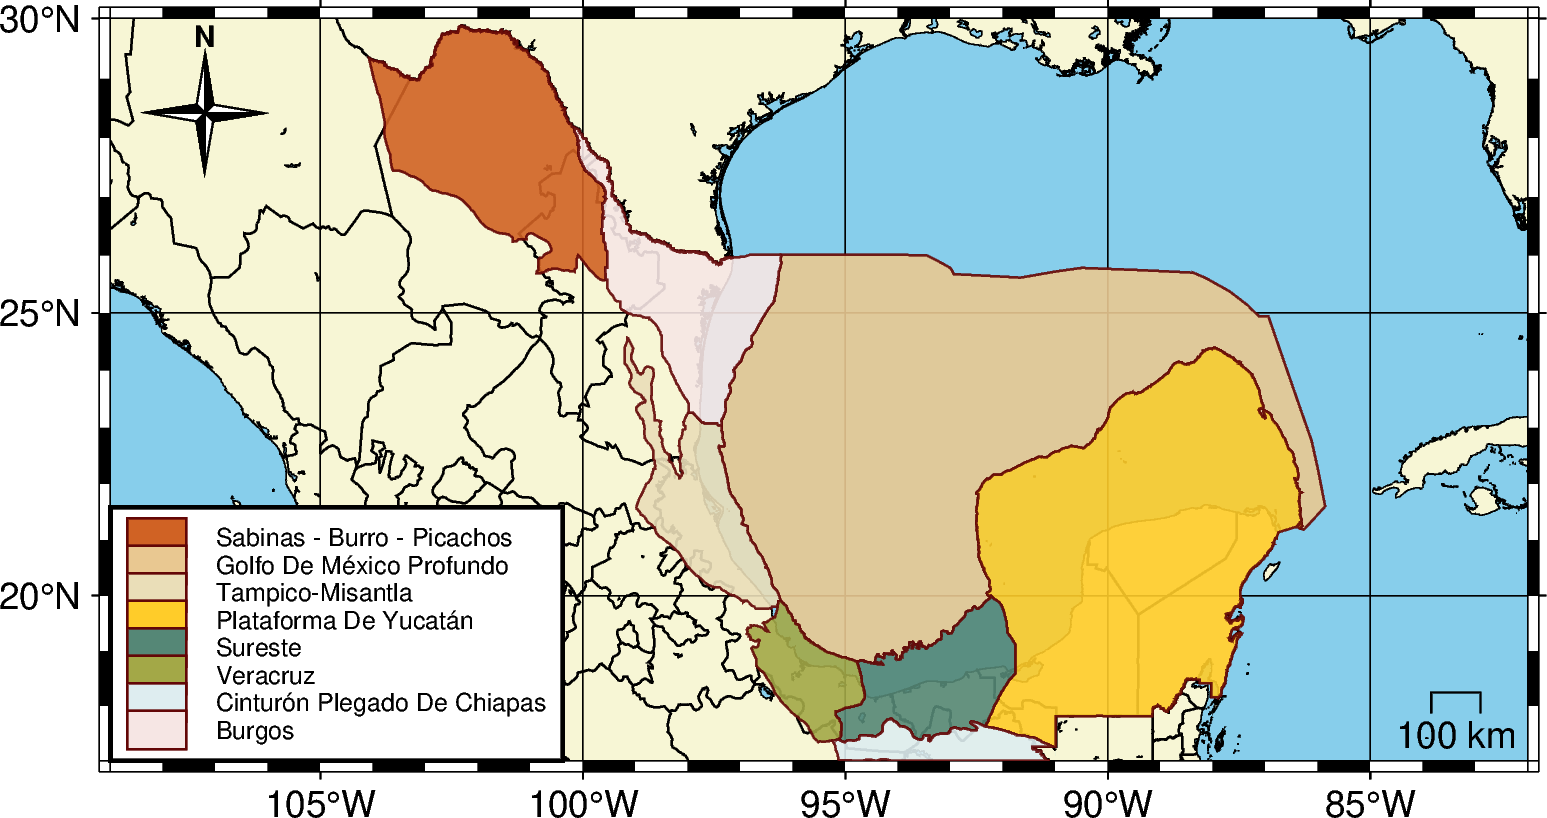

In [24]:
fig=gmt.Figure()
fig.coast(
    region=[-109,-82,17,30], #long min, long max, lat min, lat max
    projection='M12c', #Mercator 12 centimentros
    frame=['afg'], #'+t"Estudios de predicción de presión de poro"'], #ag para las cotas y el grid, titulo
    land='#F7F6D5', #color de la corteza terrestre
    water='skyblue', #color del agua
    shorelines=True, #linea de costa
    map_scale="jRB+w100k+u+o0.4c", #escla f+w1000k
    Td='jTL+o0.3c+w1c+f1', #rosa de los vientos
    borders=["1/0.5p,black", "2/0.5p,black"], #limites fornterizos , "2/0.5p,black"
    resolution='f'
)

#Norte
fig.text(text="N", x=-107.2, y=29.7, font="7p,Helvetica-Bold,black")

for i in range(8):
    provincia='cuenca'+str(i+1)+'.gmt'
    fig.plot(
        data=provincia,  #archivo GMT
        pen="0.5p,#630606",  #contorno
        color=colors[i],  #color de relleno
        close=True,  #forzar cerrar el poligono
        label=nombres[i].replace(" ", r'\040'), #nombre de la cuenca
        transparency=10 #transparencia
    )
with gmt.config(FONT_ANNOT_PRIMARY="6p"): #Para cambiar el tamano de la fuente
    fig.legend(position='JBL+jBL',box='+gwhite+p1p') # Simbologia
fig.show(dpi=300)

### Se crean el dataframe de los pozos

In [25]:
df=pd.DataFrame({
    'Nombre':['Galaxia-IMP','Limonaria-IMP','Kunah-1','Labay-1','Lakach-1','Noxal-1','Holok-1','Calicanto-101','Chocol-1',
              'Sejel-1','Huaycura-1001','Valeriana-1DEL','Dzimpona-1'],
    'Lat':[28.041, 21.653, 19.478, 19.222, 19.022, 18.934, 19.121, 17.889, 18.363, 18.31, 18.348, 18.14, 18.132],
    'Lon':[-100.181, -98.067, -94.945, -95.282, -95.254, -94.935, -94.38, -93.715, -93.268, -93.228, -93.016, -92.826, -92.721]
})

### Se pasa a GeoPandas

In [26]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))

### Grafique los puntos

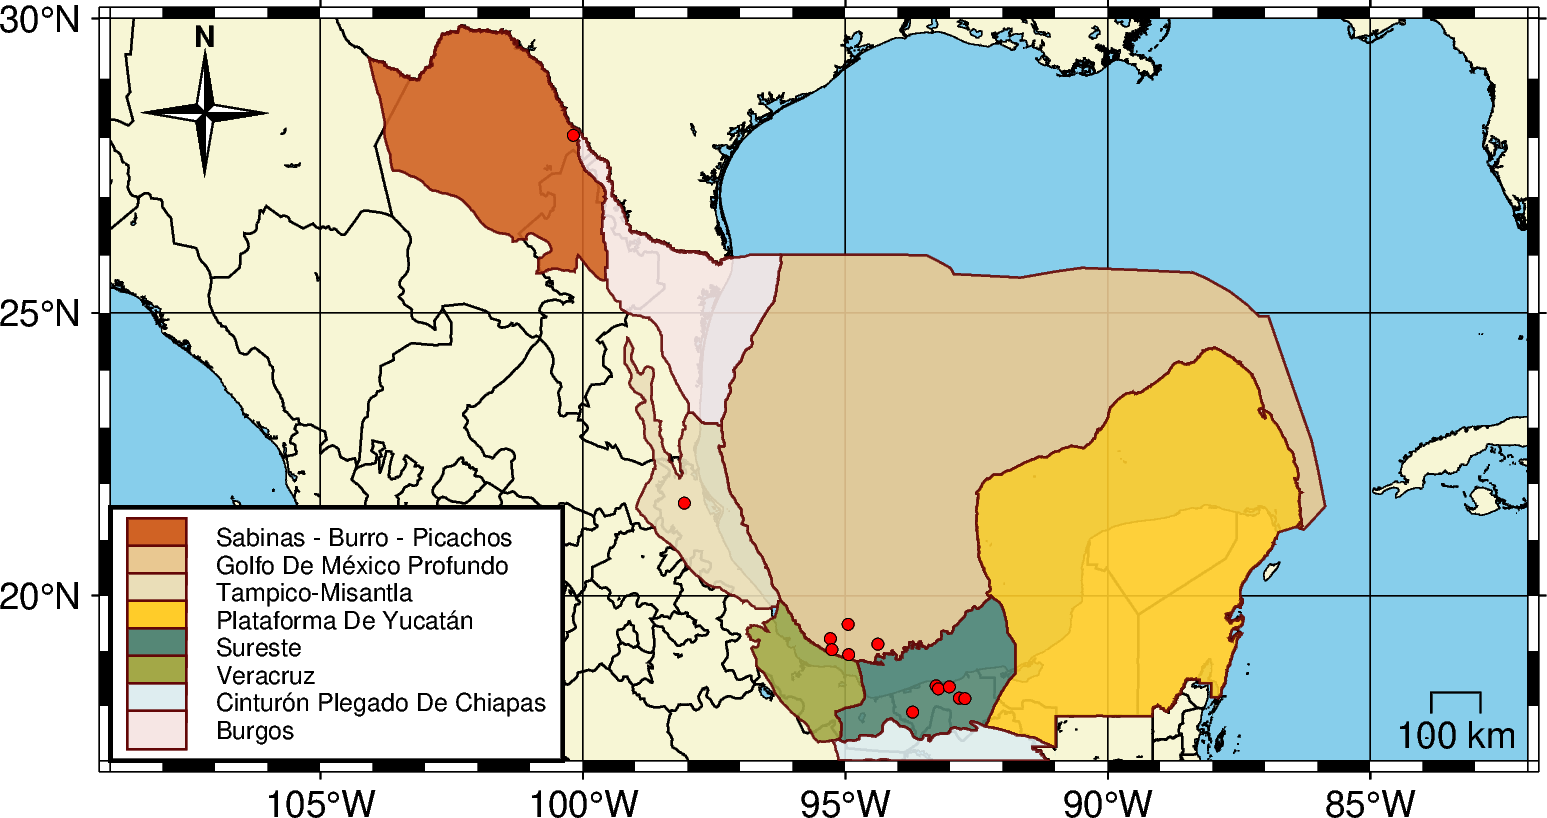

In [27]:
# Pozos
fig.plot(data=gdf, style="c0.1c", color='red', pen="0.1p,black")
fig.show()

### Graficar el inset

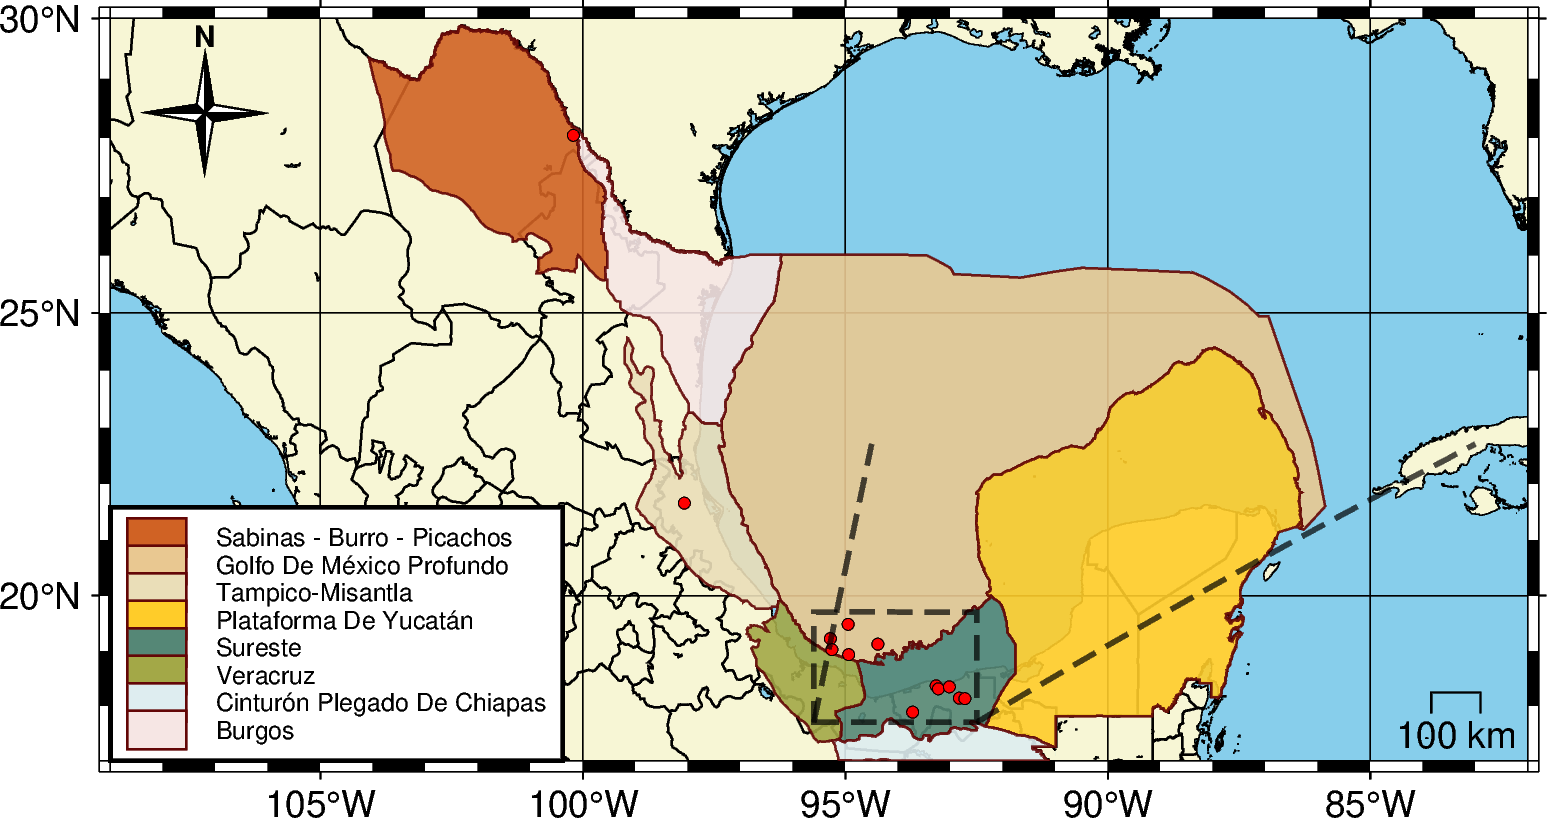

In [28]:
with gmt.config(MAP_LINE_STEP = '0.75p'):
    # encuadre de la zona del mapa original a hacerle zoom
    data = np.array([[-95.6,17.7], #Bottom Left
                     [-92.5, 17.7], #Bottom Right
                     [-92.5, 19.7], #Top Right
                     [-95.6, 19.7], #Top Left
                     [-95.6,17.7]]) #Bottom Left
    fig.plot(data=data,pen='1.2,black,6_3:0p',transparency='30',no_clip=True)
    
    # lineas del nuevo inset BL
    fig.plot(x=[-95.6,-94.5],y=[17.7,22.7],pen='1.2,black,6_3:0p.',transparency='30',no_clip=True)
    
    #BR
    fig.plot(x=[-92.5,-83],y=[17.7,22.7],pen='1.2,black,6_3:0p.',transparency='30',no_clip=True)
fig.show()

In [29]:
df['Nombre'][8]

'Chocol-1'

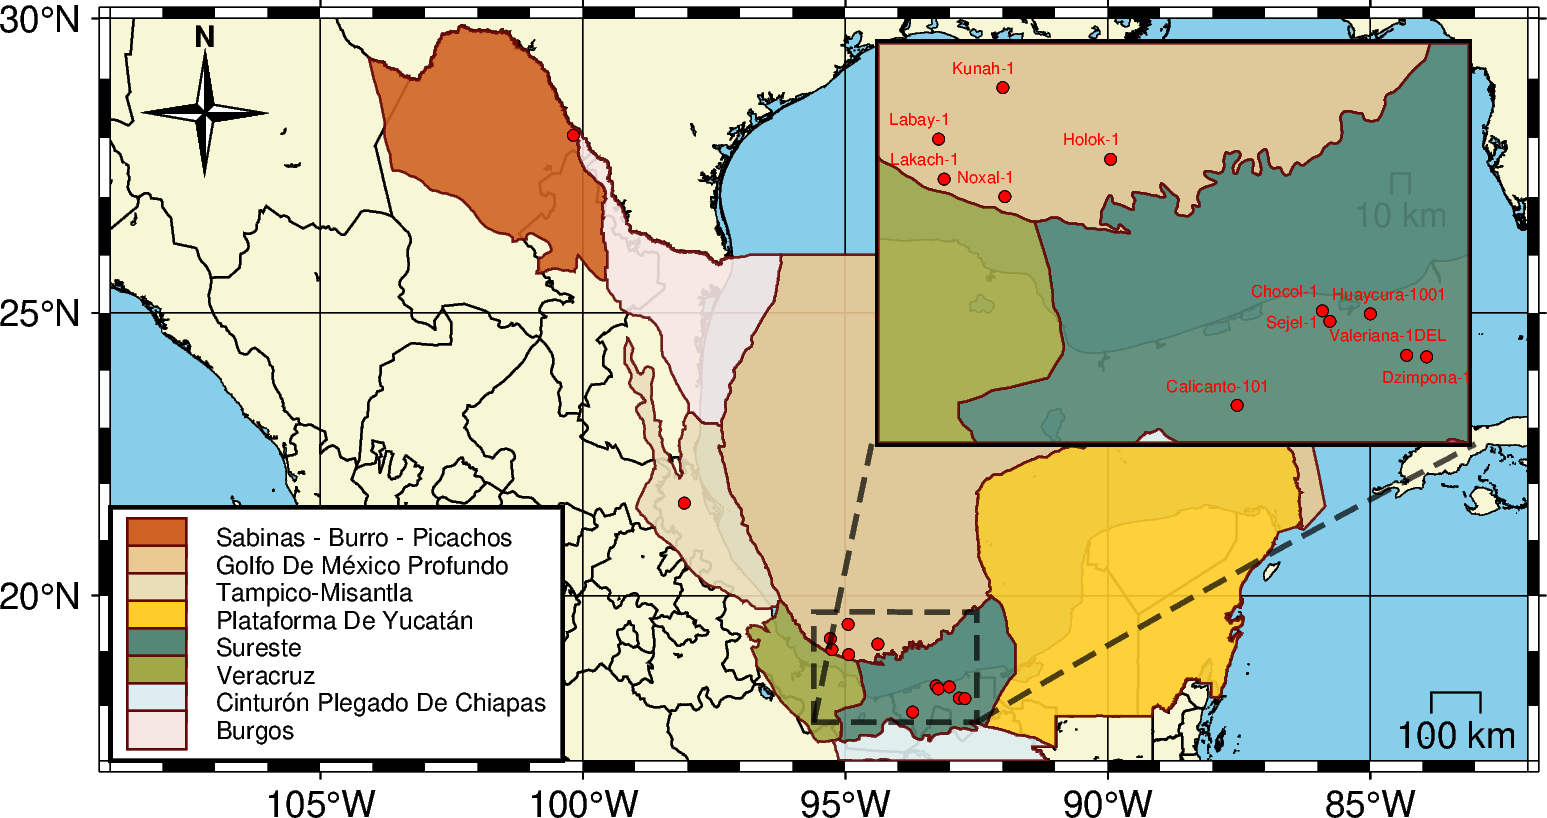

In [30]:
with fig.inset(position='jTR+w5c/3.4c+o0.5c/0.2c', margin=0, box="+pblack"): #-96/-84.8/20.8/27.3
    fig.coast(
        region=[-95.6,-92.5,17.7,19.7], #long min, long max, lat min, lat max
        projection='M?', #Mercator 12 centimentros
        land='#F7F6D5', #color de la corteza terrestre
        water='skyblue', #color del agua
        shorelines=True, #linea de costa
        map_scale="jMR+w10k+u+o0.5c", #escla f+w1000k
        resolution='f'
    )
    for i in range(8):
        provincia='cuenca'+str(i+1)+'.gmt'
        fig.plot(
            data=provincia,  #archivo GMT
            pen="0.5p,#630606",  #contorno
            color=colors[i],  #color de relleno
            close=True,  #forzar cerrar el poligono
            transparency=10 #transparencia
        )
    fig.plot(x=df['Lon'].values, y=df['Lat'].values, style="c0.1c", color='red', pen="0.1p,black")
    for a in range (0,8):
        fig.text(text=df['Nombre'][a], x=df['Lon'][a]-0.1, y=df['Lat'][a]+0.1, font="4p,Helvetica,red")
    
    fig.text(text='Chocol-1', x=-93.268-0.2, y=18.363+0.1, font="4p,Helvetica,red")
    fig.text(text='Sejel-1', x=-93.228-0.2, y=18.31, font="4p,Helvetica,red")
    fig.text(text='Huaycura-1001', x=-93.016+0.1, y=18.348+0.1, font="4p,Helvetica,red")
    fig.text(text='Valeriana-1DEL', x=-92.826-0.1, y=18.14+0.1, font="4p,Helvetica,red")
    fig.text(text='Dzimpona-1', x=-92.721, y=18.132-0.1, font="4p,Helvetica,red")
fig.show()

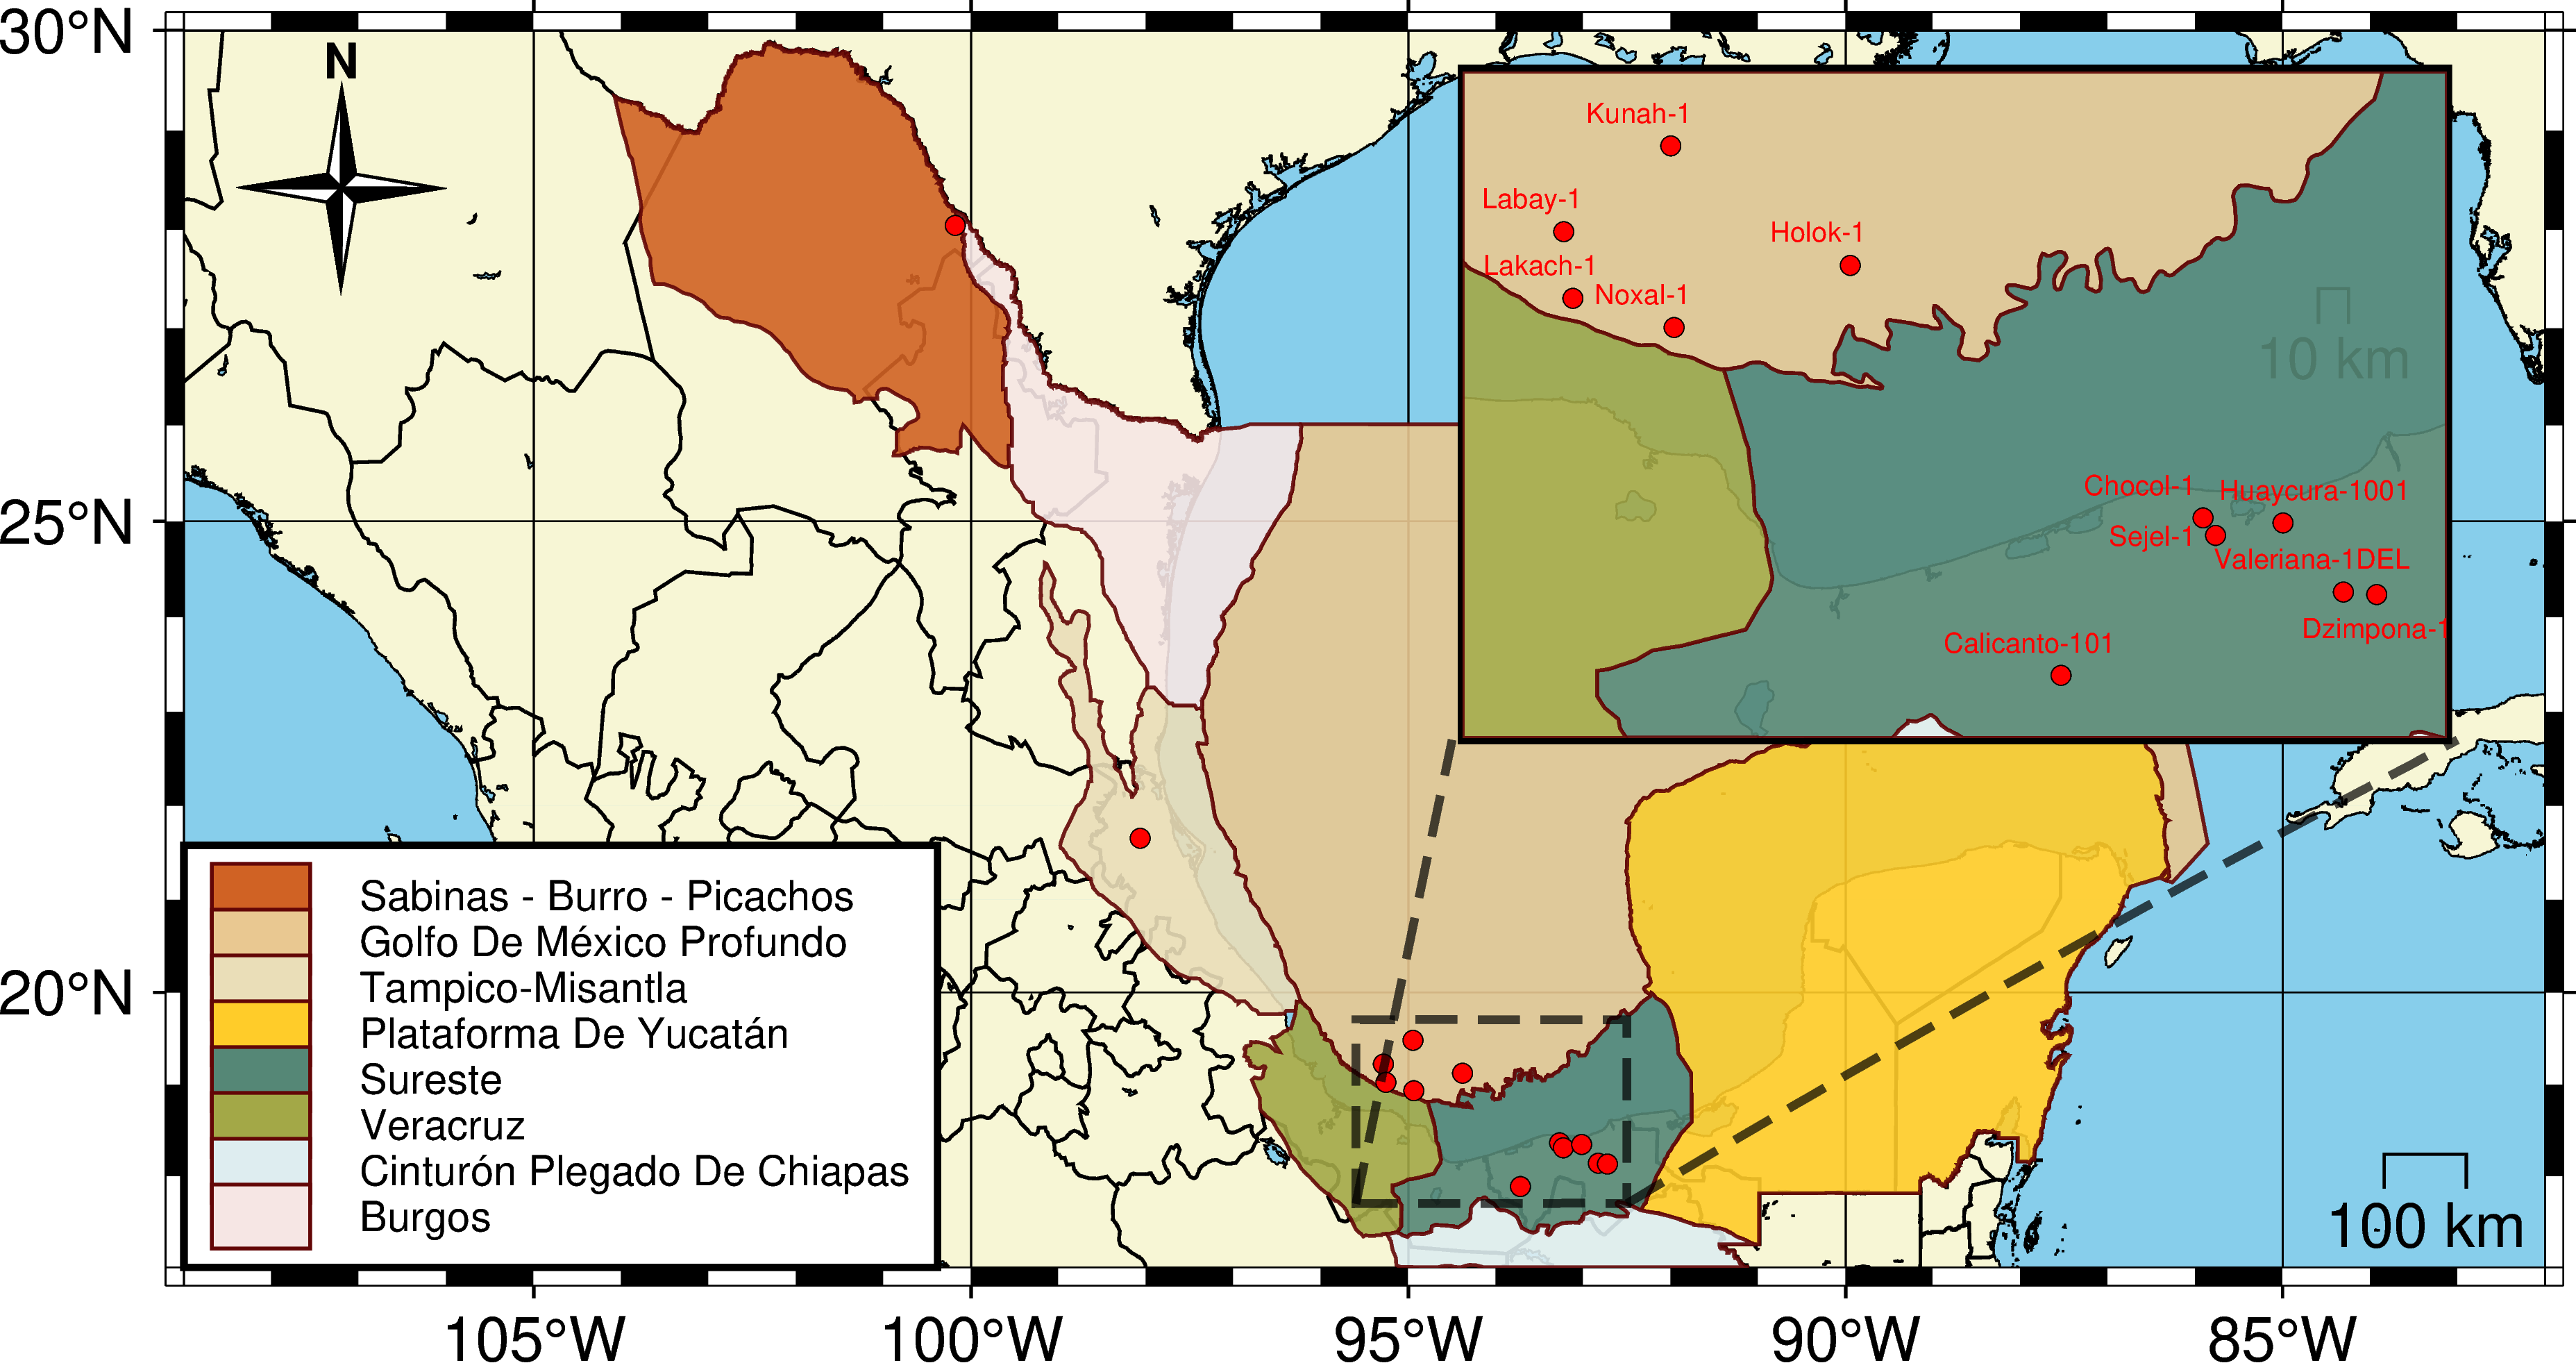

In [31]:
fig.show(dpi=720)

In [32]:
gdf

,Nombre,Lat,Lon,geometry
0,Galaxia-IMP,28.041,-100.181,POINT (-100.18100 28.04100)
1,Limonaria-IMP,21.653,-98.067,POINT (-98.06700 21.65300)
2,Kunah-1,19.478,-94.945,POINT (-94.94500 19.47800)
3,Labay-1,19.222,-95.282,POINT (-95.28200 19.22200)
4,Lakach-1,19.022,-95.254,POINT (-95.25400 19.02200)
5,Noxal-1,18.934,-94.935,POINT (-94.93500 18.93400)
6,Holok-1,19.121,-94.380,POINT (-94.38000 19.12100)
7,Calicanto-101,17.889,-93.715,POINT (-93.71500 17.88900)
8,Chocol-1,18.363,-93.268,POINT (-93.26800 18.36300)
9,Sejel-1,18.310,-93.228,POINT (-93.22800 18.31000)


- Galaxia aprox
Latitud: 28.041
Longitud: -100.181

- Limonaria aprox
Latitud: 21.653
Longitud: -98.067

Pozos
- Kunah-1
Latitud: 19.478
Longitud: -94.945

- Labay-1
Latitud: 19.222
Longitud: -95.282

- Lakach-1
Latitud: 19.022
Longitud: -95.254

- Noxal-1
Latitud: 18.934
Longitud: -94.935

- Holok-1
Latitud: 19.121
Longitud: -94.38

- Calicanto-101
Latitud: 17.889
Longitud: -93.715

- Gotico-1


- Chocol-1
Latitud: 18.363
Longitud: -93.268

- Sejel-1
Latitud: 18.31
Longitud: -93.228

- Huaycura-1001 encontre el 1 no el 1001
Latitud: 18.348
Longitud: -93.016

- Kanemi-1


- Valeriana-1DEL
Latitud: 18.14
Longitud: -92.826

- Dzimpona-1
Latitud: 18.132
Longitud: -92.721

### Paginas de ayuda
- https://github.com/GenericMappingTools/pygmt/issues/477
- https://forum.generic-mapping-tools.org/t/how-to-color-polygons-of-a-geopandas-dataframe-in-pygmt/1138/2
- https://docs.generic-mapping-tools.org/dev/cookbook/features.html#auto-scaling
- https://forum.generic-mapping-tools.org/t/hi-guys-would-you-help-me-find-that-why-my-inset-pic-is-not-complete-thanks/1675/2
- 